#  **TASK 2**

----------------

 # Problem Definition

- The dataset comprises information about various beauty and personal care products, including their names and prices.
- The objective is to analyze the dataset and derive insights that can help both consumers and sellers.

----------------

# [Url](https://www.amazon.eg/s?i=beauty&rh=n%3A21826026031%2Cp_6%3AA1ZVRGNO5AYLOV&dc&fs=true&language=en&ds=v1%3AbqKFffr9dbH%2B1SHo%2FWsOjhFdCLTLwtM5LzsotRp0Y1U&qid=1714926236&rnid=21909121031&ref=sr_nr_p_6_1) 

----------------

# Web Scraping 

### Bringing All Together

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import csv

with open("Data_science.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Price", "Name"])

    row_count = 0

    num_pages = 106

    for page in range(1, num_pages + 1):
        url = f"https://www.amazon.eg/s?i=beauty&rh=n%3A21826026031&dc&fs=true&language=en&qid=1714929530&rnid=21909125031&ref=sr_pg_{page}"

        response = requests.get(url)

        soup = BeautifulSoup(response.text, "html.parser")

        containers = soup.findAll("div", {"class": "sg-col-inner"})

        for i in containers:
            price = i.findAll("span", {"class": "a-price-whole"})
            price = price[0].text.strip() if price else "Not Available"
            
            name = i.findAll("span", {"class": "a-size-base-plus a-color-base a-text-normal"})
            name = name[0].text.strip() if name else "Not Available"

            writer.writerow([price, name])
            
            row_count += 1
            
            if row_count > 1700:
                break

        if row_count > 1000:
            break

print("Scraping complete.")
print("Total rows scraped:", row_count)


Scraping complete.
Total rows scraped: 1026


### read file with pandas 

In [2]:
import pandas as pd

In [3]:
amazon=pd.read_csv('Data_science.csv')

In [4]:
amazon

,Price,Name
0,Not Available,Not Available
1,Not Available,Not Available
2,Not Available,Not Available
3,Not Available,Not Available
4,80.,Purity - Rosemary Oil Steam Distilled 100% Pur...
...,...,...
1021,60.,"Purity - Rosehip Oil Unrefined , Carrier for E..."
1022,317.,"FOGG SCENT Oud for Men, Eau de Parfum - 100 ml"
1023,78.,FOGG Masters Body Spray Cedar For Men
1024,665.,Prime Sauvage Perfume for Men - 100 ml


In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1026 non-null   object
 1   Name    1026 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


----------------

# Data pre-processing methods
1. `Handling DataTypes`
2. `Handling missing values`
3. `Removing duplicates`
4. `Handling outliers`

In [39]:
amazon['Price'] = pd.to_numeric(amazon['Price'], errors='coerce')

In [40]:
test=amazon.dtypes
test

Price    float64
Name      object
dtype: object

In [41]:
# Convert 'Not Available' to NaN
amazon.replace('Not Available', pd.NA, inplace=True)

# Drop rows with NaN values
amazon.dropna(subset=['Price', 'Name'], inplace=True)

In [42]:
amazon

,Price,Name
0,80.0,Purity - Rosemary Oil Steam Distilled 100% Pur...
1,78.0,Fogg marco perfume spray for men - 120 ml
2,78.0,Fogg royal perfume spray men - 120 ml
3,414.0,La Muse Salute Man by La Muse Eau De Parfum Sp...
4,175.0,"Rosemary oil for hair, rosemary oil for hair g..."
5,61.0,Eau de cologne twist berries 250 ml
6,32.0,X Pocket Men's Leather & Cookies 17ml
7,70.0,"JOHNSON’S Baby Cologne, Dream, 100ml"
8,175.0,"Fogg scent oud for men, eau de parfum - 50 ml"
9,70.0,AVUVA Body Splash Vanilla Coconut 55ml


In [43]:
# Remove duplicate rows
amazon.drop_duplicates(inplace=True)
# Remove duplicate columns
amazon = amazon.T.drop_duplicates().T

In [44]:
amazon

,Price,Name
0,80.0,Purity - Rosemary Oil Steam Distilled 100% Pur...
1,78.0,Fogg marco perfume spray for men - 120 ml
2,78.0,Fogg royal perfume spray men - 120 ml
3,414.0,La Muse Salute Man by La Muse Eau De Parfum Sp...
4,175.0,"Rosemary oil for hair, rosemary oil for hair g..."
5,61.0,Eau de cologne twist berries 250 ml
6,32.0,X Pocket Men's Leather & Cookies 17ml
7,70.0,"JOHNSON’S Baby Cologne, Dream, 100ml"
8,175.0,"Fogg scent oud for men, eau de parfum - 50 ml"
9,70.0,AVUVA Body Splash Vanilla Coconut 55ml


In [45]:
amazon.reset_index(drop=True, inplace=True)

In [46]:
amazon

,Price,Name
0,80.0,Purity - Rosemary Oil Steam Distilled 100% Pur...
1,78.0,Fogg marco perfume spray for men - 120 ml
2,78.0,Fogg royal perfume spray men - 120 ml
3,414.0,La Muse Salute Man by La Muse Eau De Parfum Sp...
4,175.0,"Rosemary oil for hair, rosemary oil for hair g..."
5,61.0,Eau de cologne twist berries 250 ml
6,32.0,X Pocket Men's Leather & Cookies 17ml
7,70.0,"JOHNSON’S Baby Cologne, Dream, 100ml"
8,175.0,"Fogg scent oud for men, eau de parfum - 50 ml"
9,70.0,AVUVA Body Splash Vanilla Coconut 55ml


--------------------------------

# Analysis using `pandas` 
# Visualization using `matplotlib` and `seaborn`
### Descriptive statistics, data visualization, correlation analysis and so on...

In [47]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Descriptive Questions(3):  what happened ?

## Q1)What is the range of prices for the products in the dataset?


## Analysis

In [48]:
Q1 = amazon['Price'].quantile(0.25)
Q3 = amazon['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = amazon[(amazon['Price'] >= lower_bound) & (amazon['Price'] <= upper_bound)]

price_range = filtered_df['Price'].max() - filtered_df['Price'].min()
print("Price range after removing outliers:", price_range)
print("Interquartile range (IQR):", IQR)


Price range after removing outliers: 388.0
Interquartile range (IQR): 157.0


## Visualization

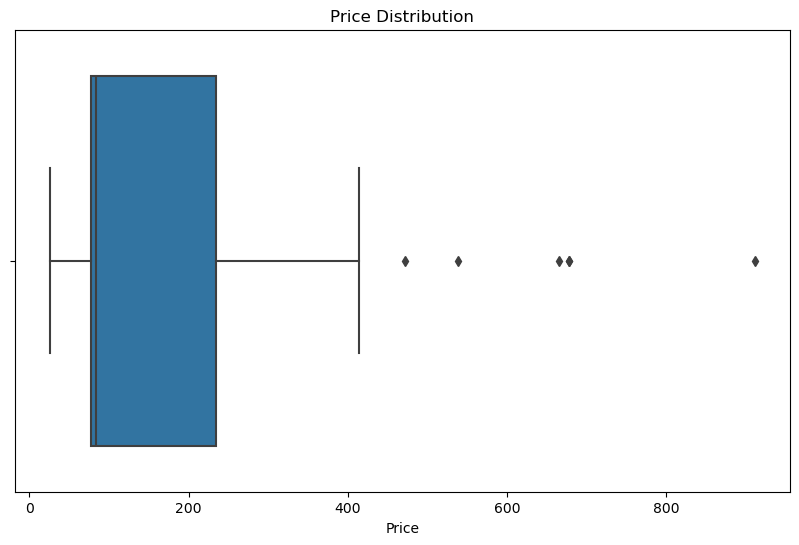

In [49]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=amazon, x='Price')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


-----------------------------

## Q2)Which product has the highest price, and what is the price?


## Analysis

In [50]:
highest_price = amazon[amazon['Price'] == amazon['Price'].max()]
print("Product with highest price:")
print(highest_price)


Product with highest price:
    Price                                     Name
16  911.0  Guess gold eau de parfum for women 75ml


## Visualization

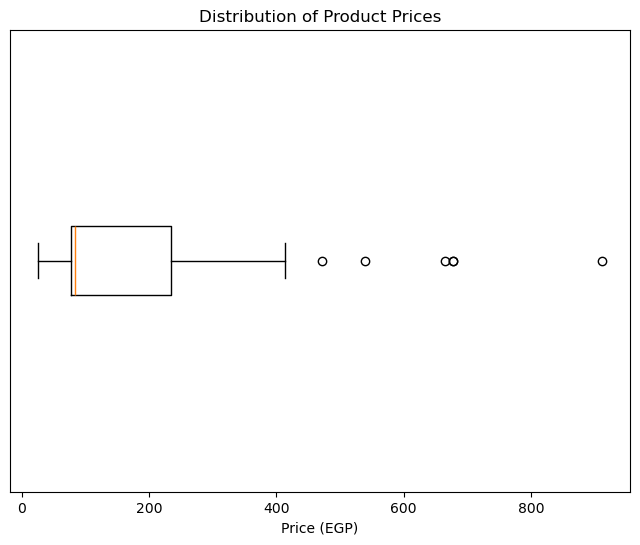

In [51]:

plt.figure(figsize=(8, 6))
plt.boxplot(amazon['Price'], vert=False)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (EGP)')
plt.yticks([])
plt.show()


----------------

## Q3)What is the lowest price of the products?


## Analysis

In [55]:
lowest_price = amazon['Price'].min()
print("Lowest price of the products:", lowest_price, "EGP")


Lowest price of the products: 26.0 EGP


## Visualization

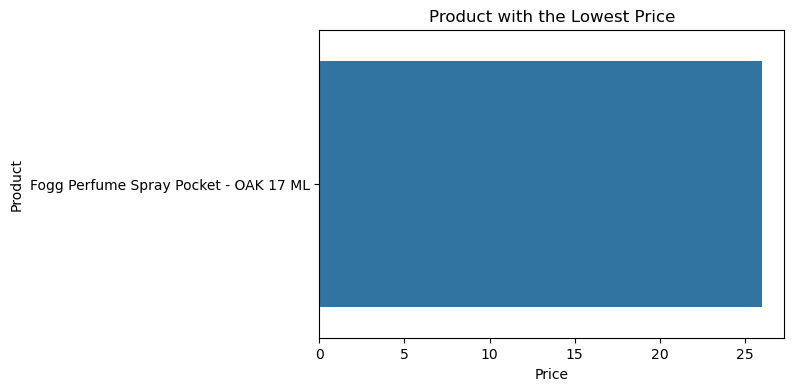

In [65]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Price', y='Name', data=lowest_price)
plt.title('Product with the Lowest Price')
plt.xlabel('Price')
plt.ylabel('Product')
plt.show()


--------------

# Diagnostic Questions(3):  why did it happen?

## Q4)Why do some products have higher prices than others?



## Analysis

In [77]:
amazon['Price'] = pd.to_numeric(amazon['Price'], errors='coerce')

top_prices = amazon.nlargest(5, 'Price')


## Visualization

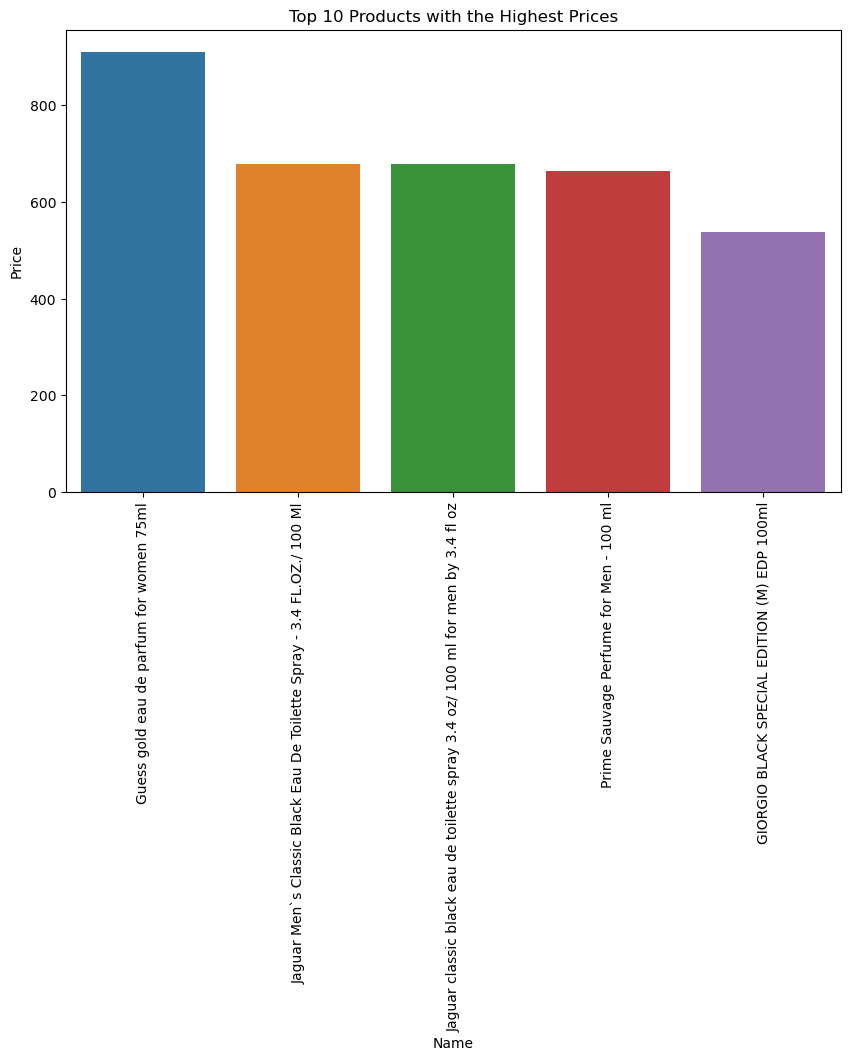

In [78]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Price', data=top_prices)
plt.title('Top 10 Products with the Highest Prices')
plt.xlabel('Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


-------------------------------------

## Q5)Why are some products priced lower than others?



## Analysis

In [82]:
bottom_prices = amazon.nsmallest(10, 'Price')


## Visualization

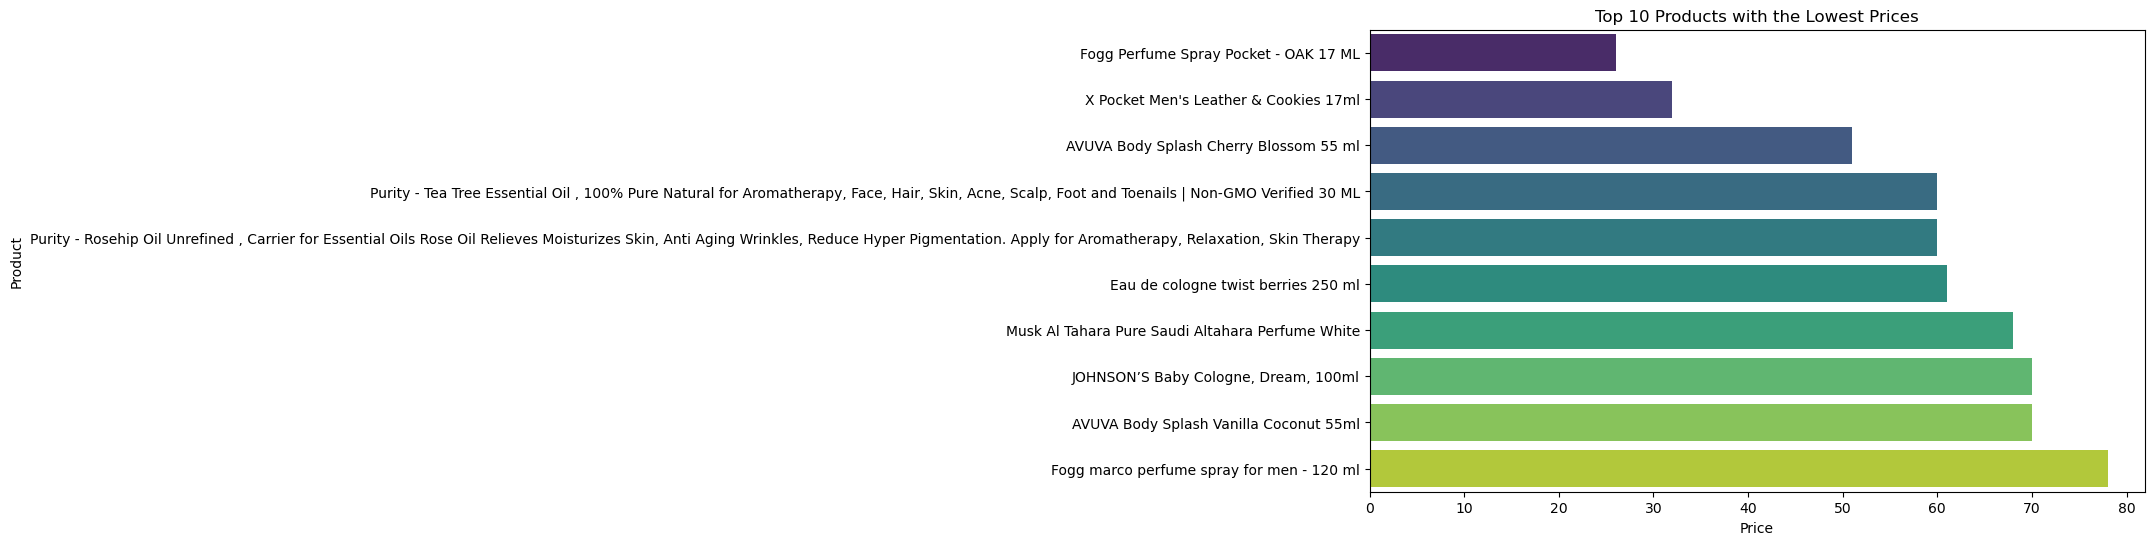

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Name', data=bottom_prices, palette='viridis')
plt.title('Top 10 Products with the Lowest Prices')
plt.xlabel('Price')
plt.ylabel('Product')
plt.show()

-------------------------------------

## Q6)What are the central tendencies (mean, mode, median) of product prices?



## Analysis

In [84]:
mean_price = amazon['Price'].mean()
mode_price = amazon['Price'].mode().values[0]
median_price = amazon['Price'].median()

## Visualization

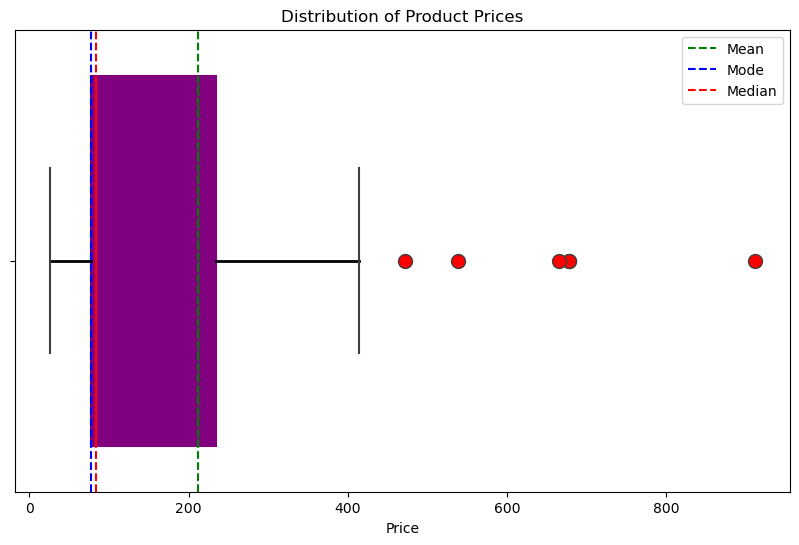

Mean price: 211.78048780487805
Mode price: 78.0
Median price: 84.0


In [87]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=amazon['Price'], showmeans=True, meanline=True, showcaps=True, medianprops={'color':'red'}, meanprops={'color':'green', 'linestyle':'--'}, whiskerprops={'linewidth':2, 'color':'black'}, flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':10}, boxprops={'color':'purple'})
plt.axvline(mean_price, color='green', linestyle='--', label='Mean')
plt.axvline(mode_price, color='blue', linestyle='--', label='Mode')
plt.axvline(median_price, color='red', linestyle='--', label='Median')
plt.legend()
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.show()

print(f"Mean price: {mean_price}")
print(f"Mode price: {mode_price}")
print(f"Median price: {median_price}")


-------------------------------------

## References

[Web-Scraping-Source-Amazon-Website](https://www.amazon.eg/s?i=beauty&rh=n%3A21826026031&dc&fs=true&language=en&qid=1714929530&rnid=21909125031&ref=sr_pg_1)

https://www.youtube.com/watch?v=h64Xbgoa6i4

https://www.youtube.com/watch?v=cdjL3wKMF5s

-----------------------------------

# Nermeen Kamal `42110428`
# Nour Khaled  `42110205`

--------------------------------------

# THANK YOU !!!